### In this notebook we'll try to evaluate VGG thanks to our abstract engine

In [1]:
import sys
sys.path.append('../src')
sys.path.append('../src')
import torch
from torch import sparse
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import vgg19
from abstractModule import AbstractLinear as AL
from abstractModule import AbstractReLU as AR
from abstractModule import AbstractMaxpool2D as AM
from abstractModule import abstractAvgPool2D as AMP
device=torch.device("cpu")
%load_ext autoreload
%autoreload 2

In [2]:
model = vgg19(pretrained=True)
model

/home/guillaume/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/guillaume/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [3]:
def compute_memory(x:torch.tensor)->str:
    memory = torch.prod(torch.tensor(x.size()))*4/10**9
    return f"Memory footprint of abstract domain {memory.numpy():.2f} GB"


In [4]:
import torch
import torch.nn as nn

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        
        # Couches de convolution
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.conv7 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.conv8 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.conv9 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.conv10 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv11 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv12 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv13 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv14 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv15 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv16 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        
        # Couches de ReLU
        self.relu = nn.ReLU(inplace=True)
        
        # Couches de pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Couches Fully Connected (FC)
        self.fc1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(25088, 4096),
        
        )
        
        self.fc2 = nn.Sequential(nn.Flatten(),
            nn.Linear(4096, 4096),
        )
        
        self.fc3 = nn.Sequential(nn.Flatten(),nn.Linear(4096, 1000))
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.relu(x)

        x = self.pool(x)
        
        x = self.conv3(x)
        x = self.relu(x) 
        x = self.conv4(x)
        x = self.relu(x)

        x = self.pool(x)

        x = self.conv5(x)
        x = self.relu(x)
        x = self.conv6(x)
        x = self.relu(x)
        x = self.conv7(x)
        x = self.relu(x)
        x = self.conv8(x)
        x = self.relu(x)

        x = self.pool(x)

        x = self.conv9(x)
        x = self.relu(x)
        x = self.conv10(x)
        x = self.relu(x)
        x = self.conv11(x)
        x = self.relu(x)
        x = self.conv12(x)
        x = self.relu(x)

        x = self.pool(x)

        x = self.conv13(x)
        x = self.relu(x)
        x = self.conv14(x)
        x = self.relu(x)
        x = self.conv15(x)
        x = self.relu(x)
        x = self.conv16(x)
        x = self.relu(x)

        x = self.pool(x)
        print(x.shape)
        x = self.avgpool(x)
 
        
        
        # Fully Connected Layers
        x = self.fc1(x)
        x= self.relu(x)
        x = self.fc2(x)
        x= self.relu(x)
        x = self.fc3(x)
        x= self.relu(x)
     
        
        return x
    
    def abstract_forward(self,x,add_symbol=False,device=torch.device("cpu")):
        self.device=device
        
        x_true = x
        x_true = x_true[0].unsqueeze(0)
        
        print(compute_memory(x))
        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv1,x,x_true,device=self.device)
        print(x.shape)
        print(f"layer 1 passed, {len(x)-2} symbols")
      
        print(compute_memory(x))
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol, device =self.device)
        print(x.shape)
        print(f"layer relu 1 passed, {len(x[0])-2} symbols")
        print(compute_memory(x))

        print(f"nombre de zeros {torch.sum(x==0)/torch.prod(torch.tensor(x.size()))*100:.2f}%")
        
        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv2,x,x_true,device=self.device)
        print(x.shape)
        print(f"layer conv2 1 passed, {len(x[0])-2} symbols")
        print(f"nombre de zeros {torch.sum(x==0)/torch.prod(torch.tensor(x.size()))*100:.2f}%")
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        print("abstract relu conv2 passed")
        print(x.shape)
        print(compute_memory(x))
        print(f"nombre de zeros {torch.sum(x==0)/torch.prod(torch.tensor(x.size()))*100:.2f}%")
        
        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer pool 1 passed, {len(x[0])-2} symbols")
        print(f"nombre de zeros {torch.sum(x==0)/torch.prod(torch.tensor(x.size()))*100:.2f}%")
        
        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv3,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv3 1 passed, {len(x[0])-2} symbols")
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer relu 3 passed, {len(x[0])-2} symbols")

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv4,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(compute_memory(x))
        print(f"layer conv4 1 passed, {len(x[0])-2} symbols")

        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer relu 4 passed, {len(x[0])-2} symbols")


        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer pool 2 passed, {len(x)-2} symbols")
        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv5,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv5 1 passed, {len(x)-2} symbols")

        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer relu 5 passed, {len(x)-2} symbols")

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv6,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv6 1 passed, {len(x)-2} symbols")

        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer relu 6 passed, {len(x)-2} symbols")


        
        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv7,x,x_true,device=self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer conv7 1 passed, {len(x)-2} symbols")

        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        print(x.shape)
        print(compute_memory(x))
        print(f"layer relu 7 passed, {len(x)-2} symbols")

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv8,x,x_true,device=self.device)
        
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      


        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv9,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv10,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv11,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv12,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      


        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv13,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv14,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv15,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      

        x,x_min,x_max,x_true = AL.abstract_conv2D(self.conv16,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu_conv2D(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
      


        x,x_min,x_max ,x_true = AM.abstract_maxpool2D(self.pool,x,x_true,add_symbol=add_symbol,device=self.device)
        
        x,x_min,x_max,x_true = AMP.abstract_AvgPool2D(self.avgpool,x,x_true,device=self.device)
 
        
        
        # Fully Connected Layers
        x,x_min,x_max,x_true = AL.abstract_linear(self.fc1,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        
        x,x_min,x_max,x_true = AL.abstract_linear(self.fc2,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        
        
        x,x_min,x_max,x_true = AL.abstract_linear(self.fc3,x,x_true,device=self.device)
        x,x_min,x_max,x_true = AR.abstract_relu(x,x_min,x_max,x_true,add_symbol=add_symbol,device =self.device)
        return x,x_min,x_max,x_true


In [5]:
C=CustomCNN()


In [6]:
num_layer_C = 0
num_layer_model = 0
for param_1 in C.parameters():
    num_layer_C +=1

for param_2 in model.parameters():
    num_layer_model += 1
print(num_layer_C,num_layer_model)
for param_1, param_2 in zip(C.parameters(), model.parameters()):
    print(param_1.data.shape, param_2.data.shape)
    param_1.data = param_2.data

for param_1, param_2 in zip(C.parameters(), model.parameters()):

    print(torch.sum(param_1.data) -torch.sum(param_2.data))

38 38
torch.Size([64, 3, 3, 3]) torch.Size([64, 3, 3, 3])
torch.Size([64]) torch.Size([64])
torch.Size([64, 64, 3, 3]) torch.Size([64, 64, 3, 3])
torch.Size([64]) torch.Size([64])
torch.Size([128, 64, 3, 3]) torch.Size([128, 64, 3, 3])
torch.Size([128]) torch.Size([128])
torch.Size([128, 128, 3, 3]) torch.Size([128, 128, 3, 3])
torch.Size([128]) torch.Size([128])
torch.Size([256, 128, 3, 3]) torch.Size([256, 128, 3, 3])
torch.Size([256]) torch.Size([256])
torch.Size([256, 256, 3, 3]) torch.Size([256, 256, 3, 3])
torch.Size([256]) torch.Size([256])
torch.Size([256, 256, 3, 3]) torch.Size([256, 256, 3, 3])
torch.Size([256]) torch.Size([256])
torch.Size([256, 256, 3, 3]) torch.Size([256, 256, 3, 3])
torch.Size([256]) torch.Size([256])
torch.Size([512, 256, 3, 3]) torch.Size([512, 256, 3, 3])
torch.Size([512]) torch.Size([512])
torch.Size([512, 512, 3, 3]) torch.Size([512, 512, 3, 3])
torch.Size([512]) torch.Size([512])
torch.Size([512, 512, 3, 3]) torch.Size([512, 512, 3, 3])
torch.Size([

In [7]:
C.eval()
model.eval()
with torch.no_grad():
    x=torch.randn(1,3,128,128)
    print(torch.sum(C(x.detach())-model(x.detach())))

torch.Size([1, 512, 4, 4])
tensor(693.1089)


torch.Size([1, 3, 128, 128])


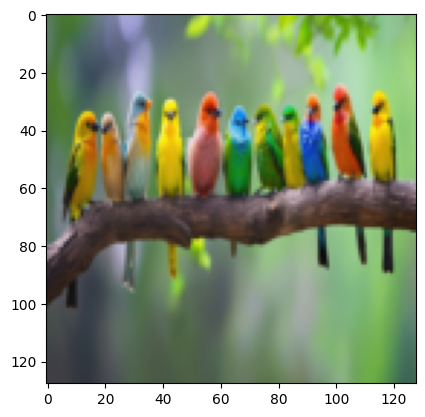

In [8]:
from PIL import Image
import torch
import torchvision.transforms as transforms

image = Image.open("../images/oiseaux.jpeg")

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
image_tensor = transform(image)

image_tensor = image_tensor.unsqueeze(0)
print(image_tensor.size())
import matplotlib.pyplot as plt
plt.imshow(image_tensor[0].permute(1, 2, 0))

In [9]:
import gc

In [10]:
dim_abstract=600
alpha_value = 0.0005 
span =torch.max(image_tensor)-torch.min(image_tensor)
print(f"span={span}")
from abstract import abstractTensor as AT 

x=AT(image_tensor.squeeze(0),alpha=alpha_value*span*torch.ones(dim_abstract)).abstract_tensor()

print(x.shape)

span=0.9647058844566345
torch.Size([602, 3, 128, 128])


In [11]:

x=x.to(device)
C.eval()

with torch.no_grad():
   result,x_min,x_max,x_true= C.abstract_forward(x.detach(),add_symbol=True,device=device)

print(compute_memory(result))

Memory footprint of abstract domain 0.12 GB
torch.Size([64, 3, 3, 3])
torch.Size([602, 64, 128, 128])
layer 1 passed, 600 symbols
Memory footprint of abstract domain 2.52 GB
torch.Size([624, 64, 128, 128])
layer relu 1 passed, 62 symbols
Memory footprint of abstract domain 2.62 GB
nombre de zeros 99.87%
torch.Size([64, 64, 3, 3])
torch.Size([624, 64, 128, 128])
layer conv2 1 passed, 62 symbols
nombre de zeros 99.71%
abstract relu conv2 passed
torch.Size([859, 64, 128, 128])
Memory footprint of abstract domain 3.60 GB
nombre de zeros 99.91%
torch.Size([64, 1, 2, 2])
torch.Size([64, 1, 2, 2])
torch.Size([64, 1, 2, 2])
torch.Size([64, 1, 2, 2])
torch.Size([1530, 64, 64, 64])
Memory footprint of abstract domain 1.60 GB
layer pool 1 passed, 62 symbols
nombre de zeros 99.94%
torch.Size([128, 64, 3, 3])
torch.Size([1530, 128, 64, 64])
Memory footprint of abstract domain 3.21 GB
layer conv3 1 passed, 126 symbols
torch.Size([1754, 128, 64, 64])
Memory footprint of abstract domain 3.68 GB
layer 

In [13]:
_ , index = torch.topk(result[0], 9)

print(index)
print(f"Evaluation effectuée sur VGG19, sur un domaine abstrait comportant {dim_abstract} symboles, avec un alpha de {alpha_value}.")
print(f"l'évaluation a généré {len(result)-2-dim_abstract} symboles de bruits.")

import json
with open("VGG_index/imagenet_class_index.json") as f:
    class_idx = json.load(f)
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

print("Les 9 classes les plus probables sont :")
labels = [idx2label[i] for i in index]
print(labels)

print(f"y_min       =  {x_min[index]}")
print(f"y_max       =  {x_max[index]}")
print(f"center Ztp  =  {result[0][index]}")
print(f"y_true      =  {x_true.squeeze(0)[index]}")
print(f"y_max-x_min =  {x_max[index]-x_min[index]}")
print(f"Trash symbol=  {result[-1][index]}")

tensor([991, 775, 794, 126, 842, 433, 395, 840, 644])
Evaluation effectuée sur VGG19, sur un domaine abstrait comportant 600 symboles, avec un alpha de 0.0005.
l'évaluation a généré 3814 symboles de bruits.
Les 9 classes les plus probables sont :
['coral_fungus', 'sarong', 'shower_curtain', 'isopod', 'swimming_trunks', 'bathing_cap', 'gar', 'swab', 'matchstick']
y_min       =  tensor([6.2389, 5.7703, 5.6846, 5.5984, 5.2473, 5.0694, 5.0585, 4.9235, 4.9027])
y_max       =  tensor([6.3096, 5.8181, 5.7494, 5.6419, 5.3025, 5.1355, 5.1136, 4.9703, 4.9448])
center Ztp  =  tensor([6.2742, 5.7942, 5.7170, 5.6202, 5.2749, 5.1025, 5.0861, 4.9469, 4.9237])
y_true      =  tensor([6.2734, 5.7945, 5.7172, 5.6206, 5.2755, 5.1029, 5.0861, 4.9476, 4.9237])
y_max-x_min =  tensor([0.0706, 0.0479, 0.0648, 0.0436, 0.0553, 0.0661, 0.0551, 0.0468, 0.0421])
Trash symbol=  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[6.2389317]
 [5.770258 ]
 [5.684603 ]
 [5.598388 ]
 [5.24725  ]
 [5.0694213]
 [5.0585165]
 [4.923534 ]
 [4.9027033]]
[0 1 2 3 4 5 6 7 8]
(9, 2)
[[6.2389317 6.309558 ]
 [5.770258  5.8181353]
 [5.684603  5.7493625]
 [5.598388  5.6419473]
 [5.24725   5.302526 ]
 [5.0694213 5.135534 ]
 [5.0585165 5.113616 ]
 [4.923534  4.9703116]
 [4.9027033 4.9447947]]
(9, 1)
(9, 1)


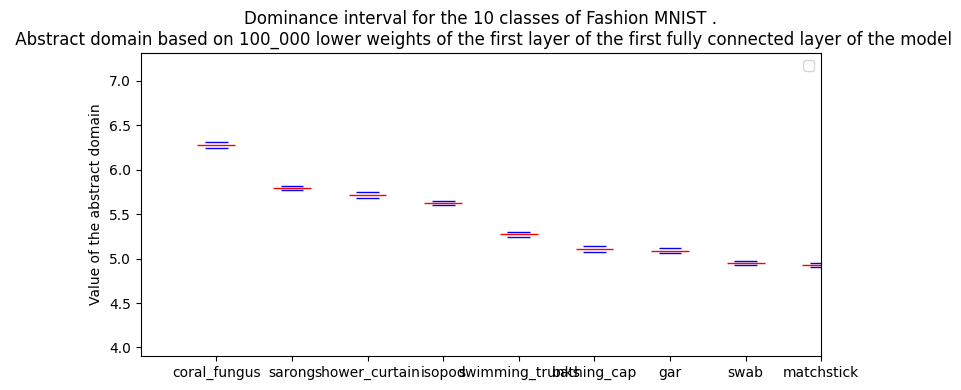

In [14]:

import matplotlib.pyplot as plt
import numpy as np
y_min       =  np.expand_dims(np.array(x_min[index]),axis=1)
y_max       =  np.expand_dims(np.array(x_max[index]),axis=1)
center_Ztp  =  np.expand_dims(np.array(result[0][index]),axis=1)
y_true      =  np.expand_dims(np.array(x_true.squeeze(0)[index]),axis=1)
y_max_minus_y_min =  np.array(x_max[index]-x_min[index])
Trash_symbol=  np.array(result[-1][index])


print(y_min)



x = np.arange(len(y_min))
print(x)
D =np.stack((y_min,y_max),axis=1).reshape(-1,2)
print(D.shape)
print(D)

print(center_Ztp.shape)
print(y_true.shape)
# plot:

fig,ax = plt.subplots(1, 1, figsize=(8,4), tight_layout=True)
ax.eventplot(D, orientation="vertical", linewidth=1,color='blue',linelengths=0.3)
ax.eventplot(y_true, orientation="vertical", linewidth=0.5,color='green',linelengths=0.4)
ax.eventplot(center_Ztp, orientation="vertical", linewidth=1,color='red',linelengths=0.5)

ax.set(xlim=(-0.5, 8),xticks=x,xticklabels=labels,
       ylim=(np.min(D)-1, np.max(D)+1))
plt.ylabel("Value of the abstract domain")
plt.title("Dominance interval for the 10 classes of Fashion MNIST .\n Abstract domain based on 100_000 lower weights of the first layer of the first fully connected layer of the model")
plt.legend()
plt.show()

In [ ]:
model.eval()
res =model(image_tensor)
_ , index = torch.topk(res, 8)
print(index)

In [ ]:
import json
with open("VGG_index/imagenet_class_index.json") as f:
    class_idx = json.load(f)
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

print("Les 8 classes les plus probables sont :")
print([idx2label[i] for i in index[0]])